<a href="https://colab.research.google.com/github/ijinshes2ly/Ecommerce_KPI_Report/blob/main/ecommerce_kpi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#EDA_시각화_연습#label_encoder 이후에 customer_bahavior.csv 시각화
import pandas as pd
df=pd.read_csv('dataset1.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    1000 non-null   int64  
 1   나이      980 non-null    float64
 2   성별      1000 non-null   object 
 3   소득      950 non-null    float64
 4   구매횟수    1000 non-null   int64  
 5   총구매금액   1000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB
None
              고객ID          나이            소득         구매횟수         총구매금액
count  1000.000000  980.000000  9.500000e+02  1000.000000  1.000000e+03
mean    500.500000   43.661224  5.110814e+06    10.112000  1.014493e+06
std     288.819436   15.000563  1.504332e+06     5.545828  4.806399e+05
min       1.000000   18.000000  6.179743e+05     1.000000  2.527357e+03
25%     250.750000   31.000000  4.096999e+06     5.000000  6.700777e+05
50%     500.500000   44.000000  5.101135e+06    10.000000  1.000917e+06
75%     750.250000   56.000

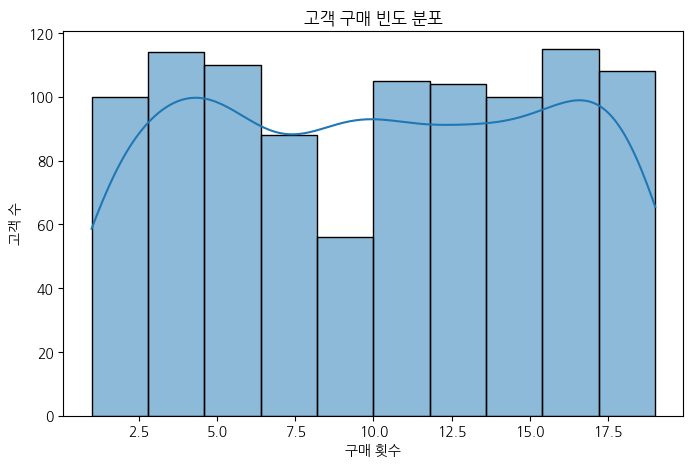

In [21]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(df["구매횟수"], bins=10, kde=True)
plt.title("고객 구매 빈도 분포")
plt.xlabel("구매 횟수")
plt.ylabel("고객 수")
plt.show()

In [5]:

df["소득"]=df["소득"].fillna(df["소득"].mean())
df["나이"]=df["나이"].fillna(df["나이"].median())
df.isnull().sum()

,0
고객ID,0
나이,0
성별,0
소득,0
구매횟수,0
총구매금액,0


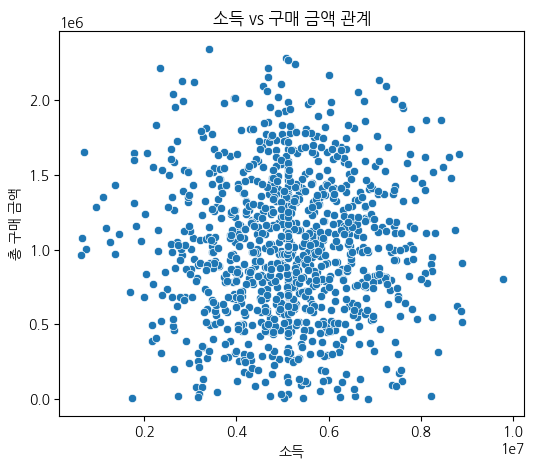

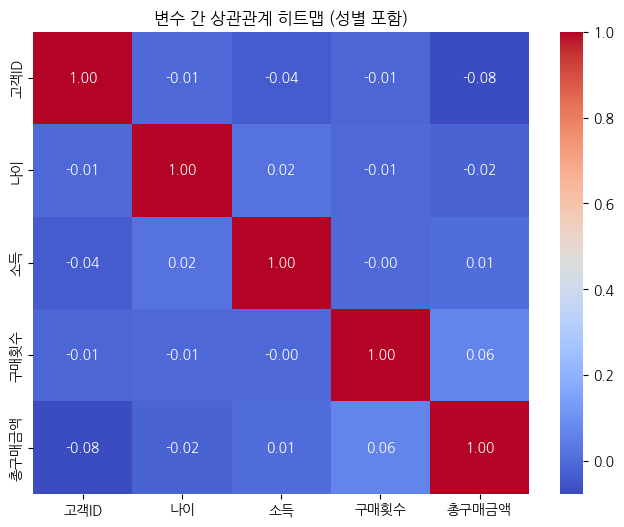

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
# 소득 vs 구매금액 관계 분석 (산점도)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["소득"], y=df["총구매금액"])
plt.xlabel("소득")
plt.ylabel("총 구매 금액")
plt.title("소득 vs 구매 금액 관계")
plt.show()



# 상관 행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 히트맵 (성별 포함)")
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# 성별을 숫자로 변환 (남성: 0, 여성: 1)
label_encoder = LabelEncoder()
df["성별"] = label_encoder.fit_transform(df["성별"])

print(df["성별"].unique())

[0 1]


In [27]:
#이커머스 쇼핑몰 마케팅 KPI 분석:전환율과 재구매율 개선 전략 보고서

import pandas as pd
df = pd.read_csv('customer_behavior.csv')
#결측치 확인
df.isnull().sum()


,0
고객ID,0
방문횟수,0
신규고객여부,0
장바구니이탈여부,0
구매횟수,0
광고채널,0
총구매금액,50
평균구매주기,20
할인사용여부,0
재구매여부,0


In [14]:
#결측치 중앙값으로 채우기.
df["총구매금액"]=df["총구매금액"].fillna(df["총구매금액"].median())
df["평균구매주기"]=df["평균구매주기"].fillna(df["평균구매주기"].median())
display(df.describe())
display(df.info())

df.isnull().sum()

display(df)

,고객ID,방문횟수,신규고객여부,장바구니이탈여부,구매횟수,총구매금액,평균구매주기,할인사용여부,재구매여부
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,750.500000,15.036000,0.297333,0.398667,2.932000,4.985186e+05,31.731333,0.500667,0.389333
std,433.157015,8.629273,0.457237,0.489787,1.586523,1.950123e+05,15.969507,0.500166,0.487762
min,1.000000,1.000000,0.000000,0.000000,0.000000,7.575978e+03,5.000000,0.000000,0.000000
25%,375.750000,7.000000,0.000000,0.000000,2.000000,3.628705e+05,18.000000,0.000000,0.000000
50%,750.500000,15.000000,0.000000,0.000000,3.000000,5.041081e+05,31.000000,1.000000,0.000000
75%,1125.250000,23.000000,1.000000,1.000000,4.000000,6.258078e+05,46.000000,1.000000,1.000000
max,1500.000000,29.000000,1.000000,1.000000,9.000000,1.110342e+06,59.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      1500 non-null   int64  
 1   방문횟수      1500 non-null   int64  
 2   신규고객여부    1500 non-null   int64  
 3   장바구니이탈여부  1500 non-null   int64  
 4   구매횟수      1500 non-null   int64  
 5   광고채널      1500 non-null   object 
 6   총구매금액     1500 non-null   float64
 7   평균구매주기    1500 non-null   float64
 8   할인사용여부    1500 non-null   int64  
 9   재구매여부     1500 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 117.3+ KB


None

,고객ID,방문횟수,신규고객여부,장바구니이탈여부,구매횟수,광고채널,총구매금액,평균구매주기,할인사용여부,재구매여부
0,1,7,0,0,2,블로그,232357.723643,21.0,0,0
1,2,20,1,0,3,인스타그램,540137.035010,19.0,1,0
2,3,29,0,0,2,페이스북,735949.521283,38.0,1,0
3,4,15,0,0,4,인스타그램,434240.916486,54.0,1,0
4,5,11,0,0,1,블로그,286118.893045,20.0,0,1
...,...,...,...,...,...,...,...,...,...,...
1495,1496,22,0,0,2,페이스북,543346.672609,48.0,0,1
1496,1497,24,0,1,3,인스타그램,506110.015873,17.0,0,0
1497,1498,25,0,1,5,인스타그램,605489.492223,28.0,1,0
1498,1499,7,0,0,1,유튜브,675830.478617,32.0,1,1


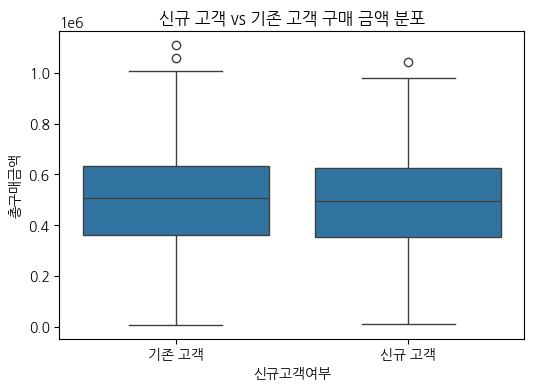

T-검정 통계량: -0.7235654071774356, P-값: 0.4694494544800115


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
!pip install koreanize-matplotlib
import koreanize_matplotlib
from scipy import stats

#신규고객과 기존고객 구매 금액 분포
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["신규고객여부"], y=df["총구매금액"])
plt.xticks([0, 1], ["기존 고객", "신규 고객"])
plt.title("신규 고객 vs 기존 고객 구매 금액 분포")
plt.show()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(df[df["신규고객여부"] == 1]["총구매금액"],
                                  df[df["신규고객여부"] == 0]["총구매금액"],
                                  nan_policy='omit')
print(f"T-검정 통계량: {t_stat}, P-값: {p_value}")

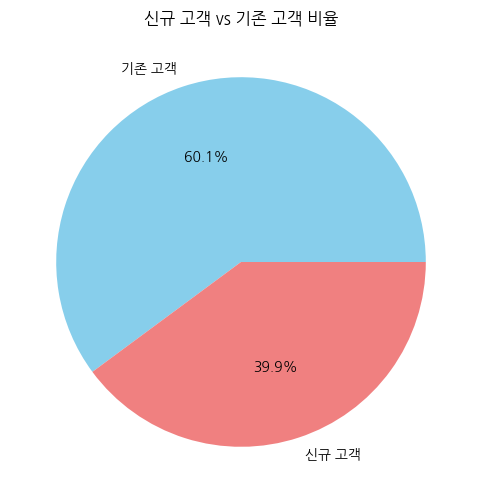

In [35]:
#신규고객과 기존고객 비교
plt.figure(figsize=(6, 6))
df["장바구니이탈여부"].value_counts().plot.pie(autopct="%.1f%%", labels=["기존 고객", "신규 고객"],
                                       colors=["skyblue", "lightcoral"])
plt.title("신규 고객 vs 기존 고객 비율")
plt.ylabel("")
plt.show()

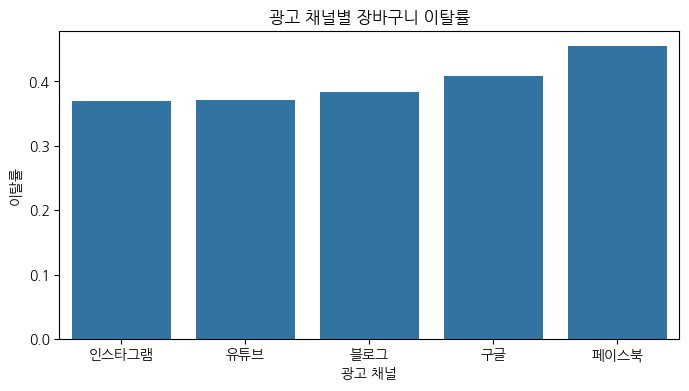

광고채널
인스타그램    0.37
유튜브      0.37
블로그      0.38
구글       0.41
페이스북     0.46
Name: 장바구니이탈여부, dtype: float64


In [30]:
#광고채널별 장바구니 이탈률
grouped= df.groupby("광고채널")["장바구니이탈여부"].mean().sort_values()
plt.figure(figsize=(8, 4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("광고 채널별 장바구니 이탈률")
plt.xlabel("광고 채널")
plt.ylabel("이탈률")
plt.show()
print(grouped.round(2))

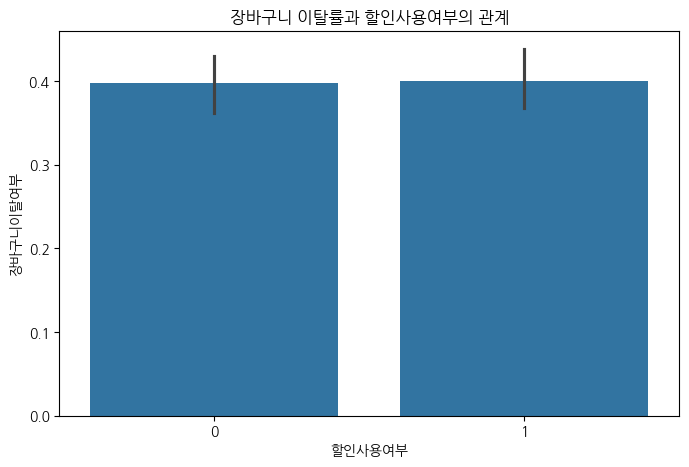

In [ ]:
#장바구니 이탈률과 할인사용 여부 관계
plt.figure(figsize=(8, 5))
sns.barplot(x=df["할인사용여부"], y=df["장바구니이탈여부"])
plt.title("장바구니 이탈률과 할인사용여부의 관계")
plt.xlabel("할인사용여부")
plt.ylabel("장바구니이탈여부")
plt.show()

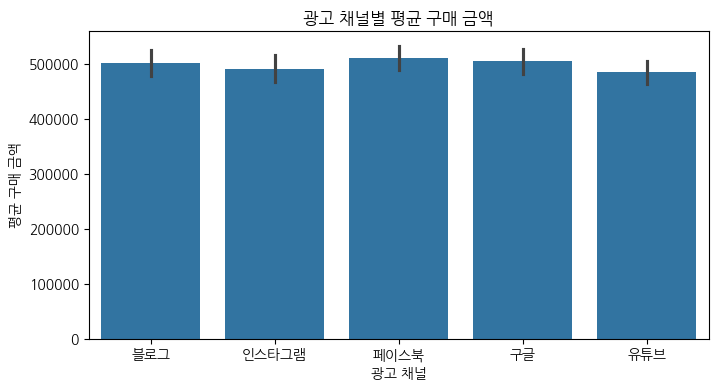

광고채널
구글       504862.0
블로그      500862.0
유튜브      484710.0
인스타그램    490392.0
페이스북     510628.0
Name: 총구매금액, dtype: float64


In [34]:
#광고채널별 평균 구매금액
plt.figure(figsize=(8, 4))
sns.barplot(x=df["광고채널"], y=df["총구매금액"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 금액")
plt.show()
print(df.groupby("광고채널")["총구매금액"].mean().round(0))

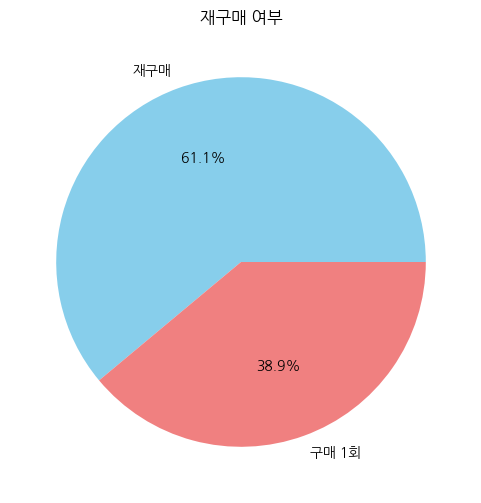

In [ ]:
plt.figure(figsize=(6, 6))
df["재구매여부"].value_counts().plot.pie(autopct="%.1f%%", labels=["재구매", "구매 1회"], colors=["skyblue", "lightcoral"])
plt.title("재구매 여부")
plt.ylabel("")
plt.show()

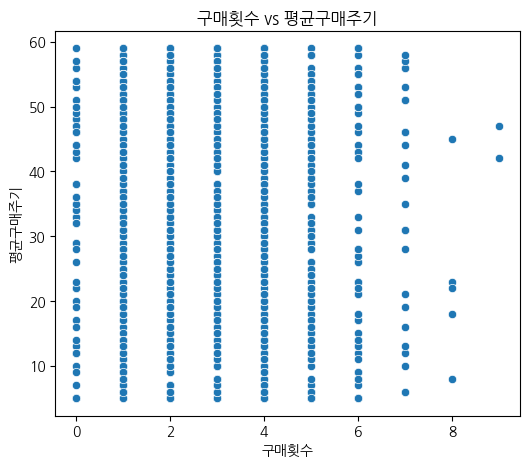

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["구매횟수"], y=df["평균구매주기"])
plt.title("구매횟수 vs 평균구매주기")
plt.xlabel("구매횟수")
plt.ylabel("평균구매주기")
plt.show()